In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


____________________________________________________
## CNN MODEL TESTING SECTION
____________________________________________________

N/A

### CNN MODEL TESTING FOR CSV FILE

In [30]:
import pandas as pd

# Load the FER-2013 dataset
# Replace 'path_to_your_data.csv' with the actual path to the FER-2013 CSV file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SENIOR PROJECT/fer-2013/fer-2013-csv-version-folder/fer2013.csv')

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Display the columns to check the dataset structure
print(df.columns)


   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training
Index(['emotion', 'pixels', 'Usage'], dtype='object')


### Preprocessing

Training Set: (28709, 48, 48, 1), (28709, 7)
Validation Set: (3589, 48, 48, 1), (3589, 7)
Test Set: (3589, 48, 48, 1), (3589, 7)


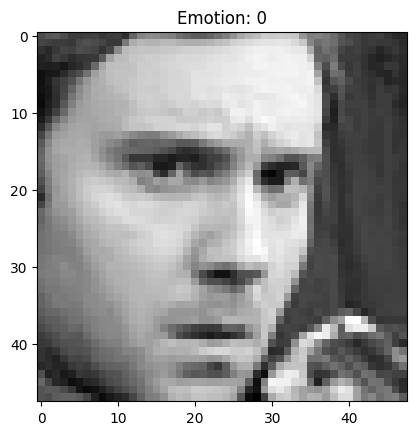

In [31]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/SENIOR PROJECT/fer-2013/fer-2013-csv-version-folder/fer2013.csv"
df = pd.read_csv(file_path)

# Convert the pixels column into NumPy arrays
def process_pixels(pixels):
    array = np.array(pixels.split(), dtype='float32')
    return array.reshape(48, 48, 1) / 255.0  # Reshape and normalize

df["pixels"] = df["pixels"].apply(process_pixels)

# Convert the emotion column to categorical labels
num_classes = df["emotion"].nunique()
df["emotion"] = df["emotion"].astype(int)
y = to_categorical(df["emotion"], num_classes=num_classes)

# Split data based on 'Usage'
X_train = np.stack(df[df["Usage"] == "Training"]["pixels"].values)
y_train = y[df["Usage"] == "Training"]

X_val = np.stack(df[df["Usage"] == "PublicTest"]["pixels"].values)
y_val = y[df["Usage"] == "PublicTest"]

X_test = np.stack(df[df["Usage"] == "PrivateTest"]["pixels"].values)
y_test = y[df["Usage"] == "PrivateTest"]

# Print dataset shapes
print(f"Training Set: {X_train.shape}, {y_train.shape}")
print(f"Validation Set: {X_val.shape}, {y_val.shape}")
print(f"Test Set: {X_test.shape}, {y_test.shape}")

# Display a sample image
plt.imshow(X_train[0].squeeze(), cmap="gray")
plt.title(f"Emotion: {np.argmax(y_train[0])}")
plt.show()


### CNN Model

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define CNN model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(48, 48, 1)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Multi-class classification
])

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,552,135 (5.92 MB)

 Trainable params: 1,551,239 (5.92 MB)

 Non-trainable params: 896 (3.50 KB)

### Train the model

In [33]:
# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=64)


Epoch 1/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 604s 1s/step - accuracy: 0.2361 - loss: 2.0550 - val_accuracy: 0.2563 - val_loss: 1.8023
Epoch 2/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 568s 1s/step - accuracy: 0.2891 - loss: 1.7183 - val_accuracy: 0.3566 - val_loss: 1.6104
Epoch 3/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 610s 1s/step - accuracy: 0.3288 - loss: 1.6519 - val_accuracy: 0.4280 - val_loss: 1.5850
Epoch 4/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 562s 1s/step - accuracy: 0.3452 - loss: 1.6020 - val_accuracy: 0.4118 - val_loss: 1.5298
Epoch 5/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 559s 1s/step - accuracy: 0.3601 - loss: 1.5614 - val_accuracy: 0.4291 - val_loss: 1.5296
Epoch 6/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 563s 1s/step - accuracy: 0.3675 - loss: 1.5260 - val_accuracy: 0.3959 - val_loss: 1.5737
Epoch 7/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 613s 1s/step - accuracy: 0.3819 - loss: 1.5104 - val_accuracy: 0.4347 - val_loss: 1.4563
Epoch 8/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 554s 1s/step - accuracy: 0.3985 - loss: 1.4400 - val_accu

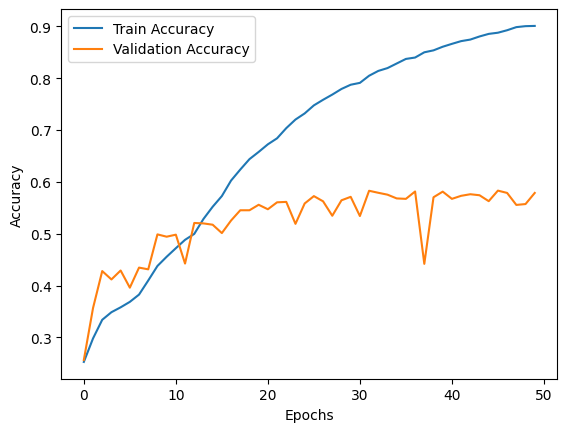

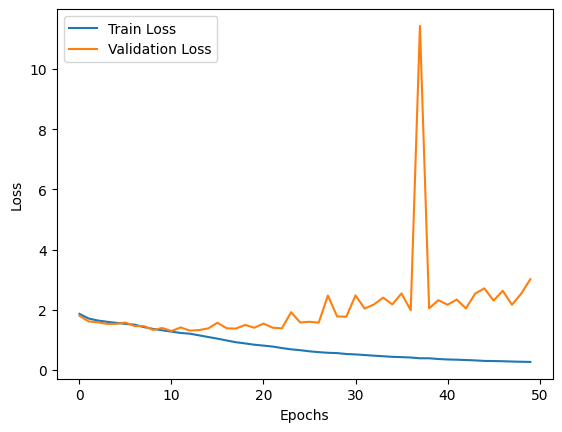

In [35]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Save CNN Model

In [34]:
model.save('fer2013_cnn_model.keras')  # Recommended Keras format

____________________________________________________
## NLP MODEL TESTING SECTION
____________________________________________________



### Load data and explore dataset

In [2]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/SENIOR PROJECT/sentiment140/training.1600000.processed.noemoticon.csv'
df = pd.read_csv(file_path, encoding='latin-1', header=None)

# Assign column names
df.columns = ['target', 'ids', 'date', 'query', 'user', 'text']

# Inspect the first few rows of the dataset
df.head()


,target,ids,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


### Preprocess data

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the punkt_tab resource

# Preprocessing function
def preprocess_text(text):
    # Remove URLs and usernames
    text = re.sub(r'http\S+|www\S+|@\S+', '', text)
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Stemming
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words]
    return ' '.join(words)

# Apply preprocessing to the 'text' column
df['processed_text'] = df['text'].apply(preprocess_text)

# Display a sample of the preprocessed data
df[['text', 'processed_text']].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,text,processed_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",that bummer shoulda got david carr third day
1,is upset that he can't update his Facebook by ...,upset cant updat facebook text might cri resul...
2,@Kenichan I dived many times for the ball. Man...,dive mani time ball manag save rest go bound
3,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,"@nationwideclass no, it's not behaving at all....",behav im mad cant see


### Vectorize text and build model

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Vectorize the text using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, use_idf=True, stop_words='english')  # Increased feature limit
X = tfidf.fit_transform(df['processed_text'])

# Labels: 0 for negative, 4 for positive
y = df['target'].apply(lambda x: 1 if x == 4 else 0).values  # Convert target to binary (1 = positive, 0 = negative)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model with added complexity
model = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='relu'),  # Increased number of neurons
    Dropout(0.3),  # Increased dropout to prevent overfitting
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model with a slightly reduced learning rate
optimizer = Adam(learning_rate=0.0005)  # Slightly reduced learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Summary of the model
model.summary()

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping and a larger batch size
history = model.fit(X_train, y_train, epochs=10, batch_size=512, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

# Predict and get classification report
y_pred = (model.predict(X_test) > 0.5).astype("int32")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 256)                 │       1,280,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,321,473 (5.04 MB)

 Trainable params: 1,321,473 (5.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 225s 89ms/step - accuracy: 0.7390 - loss: 0.5219 - val_accuracy: 0.7691 - val_loss: 0.4779
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 255s 87ms/step - accuracy: 0.7755 - loss: 0.4705 - val_accuracy: 0.7744 - val_loss: 0.4704
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 262s 86ms/step - accuracy: 0.7911 - loss: 0.4452 - val_accuracy: 0.7762 - val_loss: 0.4689
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 262s 87ms/step - accuracy: 0.8070 - loss: 0.4186 - val_accuracy: 0.7752 - val_loss: 0.4740
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 286s 96ms/step - accuracy: 0.8199 - loss: 0.3940 - val_accuracy: 0.7735 - val_loss: 0.4837
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 259s 95ms/step - accuracy: 0.8320 - loss: 0.3714 - val_accuracy: 0.7714 - val_loss: 0.5003
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 61s 6ms/step - accuracy: 0.7758 - loss: 0.4682
Test Accuracy: 77.62%
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 6ms/step
              precision    recall  f1-score   support


### Predictions

In [8]:
import random # Import the random module

# Predict the sentiment of 20 random test samples
random_samples = random.sample(range(len(X_test.toarray())), 20)  # Get 20 random indices from the test set

# Get the texts and labels for these samples
sample_texts = [df.iloc[i]['processed_text'] for i in random_samples]
sample_labels = [y_test[i] for i in random_samples]

# Get predictions for these 20 samples
sample_predictions = (model.predict(X_test[random_samples]) > 0.5).astype("int32") # Replace best_model with model

# Print out the text, actual label, and predicted label
print("Predictions for 20 samples:")
for i in range(20):
    actual = 'positive' if sample_labels[i] == 1 else 'negative'
    predicted = 'positive' if sample_predictions[i] == 1 else 'negative'
    print(f"Text: {sample_texts[i]}\nActual: {actual}\nPredicted: {predicted}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
Predictions for 20 samples:
Text: wasnt asleep long thirti text
Actual: negative
Predicted: negative

Text: damn wan na cant im sad love sweeti
Actual: negative
Predicted: negative

Text: west elm wan na go cant believ earli got
Actual: positive
Predicted: positive

Text: go walk
Actual: negative
Predicted: negative

Text: that felt like nahulugan ako ng someth hard gtlt
Actual: negative
Predicted: positive

Text: disappoint
Actual: negative
Predicted: positive

Text: prayer one air franc flight famili sad
Actual: positive
Predicted: positive

Text: lucki ass wan na go giant game
Actual: negative
Predicted: negative

Text: hate school right lucki dont go
Actual: negative
Predicted: positive

Text: im super sleepi
Actual: positive
Predicted: positive

Text: diddi awak im also knick fan id rather get wade
Actual: positive
Predicted: positive

Text: go get readi school tommorow
Actual: negative
Predicted: negative

Text: lol look stone lol wan na mov

### Testing Unseen Data

In [28]:
# Example unseen data (new text samples for prediction)
unseen_data = [
    "I love this product, it works great!",  # Positive sentiment
    "This is the worst movie I have ever seen",  # Negative sentiment
    "The service was amazing, would definitely come back!",  # Positive sentiment
    "I am not happy with the quality of the phone",  # Negative sentiment
]

# Preprocess the unseen data using the same TF-IDF vectorizer
unseen_data_tfidf = tfidf.transform(unseen_data)

# Predict sentiment for the unseen data
predictions = model.predict(unseen_data_tfidf)

# Convert predictions to binary (0 = negative, 1 = positive)
predicted_labels = (predictions > 0.5).astype("int32")

# Display predictions
for i, text in enumerate(unseen_data):
    sentiment = 'positive' if predicted_labels[i] == 1 else 'negative'
    print(f"Text: '{text}' \nPredicted Sentiment: {sentiment}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Text: 'I love this product, it works great!' 
Predicted Sentiment: positive

Text: 'This is the worst movie I have ever seen' 
Predicted Sentiment: negative

Text: 'The service was amazing, would definitely come back!' 
Predicted Sentiment: positive

Text: 'I am not happy with the quality of the phone' 
Predicted Sentiment: negative



### Save NLP models

In [10]:
# Save the trained model in the native Keras format
model.save('sentiment_analysis_model.keras')


Use this to load saved model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model in the new Keras format
loaded_model = load_model('sentiment_analysis_model.keras')

# Verify that the model is loaded properly by checking its summary
loaded_model.summary()
